# Comparativa de métodos de medición

In [52]:
datos = read.csv("datos/hidrometro/ceneha_vs_prefectura.csv", sep=";")
datos$FechayHora = as.POSIXct(datos$FechayHora, format = "%d/%m/%Y %H:%M")
str(datos)
attach(datos)
head(datos)

'data.frame':	729 obs. of  3 variables:
 $ FechayHora      : POSIXct, format: "2017-07-26 12:00:00" "2017-07-26 00:00:00" ...
 $ AlturaCeneha    : num  4.27 4.28 4.21 4.23 4.15 4.18 4.08 4.12 3.98 4.03 ...
 $ AlturaPrefectura: num  4.25 4.28 4.18 4.2 4.15 4.18 4.1 4.13 4.03 4.03 ...


The following objects are masked from datos (pos = 5):

    AlturaCeneha, AlturaPrefectura, FechayHora

The following objects are masked from datos (pos = 6):

    AlturaCeneha, AlturaPrefectura, FechayHora

The following objects are masked from datos (pos = 8):

    AlturaCeneha, AlturaPrefectura, FechayHora

The following object is masked from datos (pos = 9):

    FechayHora



FechayHora,AlturaCeneha,AlturaPrefectura
2017-07-26 12:00:00,4.27,4.25
2017-07-26 00:00:00,4.28,4.28
2017-07-27 12:00:00,4.21,4.18
2017-07-27 00:00:00,4.23,4.20
2017-07-28 12:00:00,4.15,4.15
2017-07-28 00:00:00,4.18,4.18


In [30]:
# no lo veo tan lindo respecto al plot nativo
#library(ggplot2)
#ggplot(aes(x = datos$FechayHora, y = datos$AlturaCeneha), data = datos) + geom_point()
#ggplot(aes(x = datos$FechayHora, y = datos$AlturaPrefectura), data = datos) + geom_line()

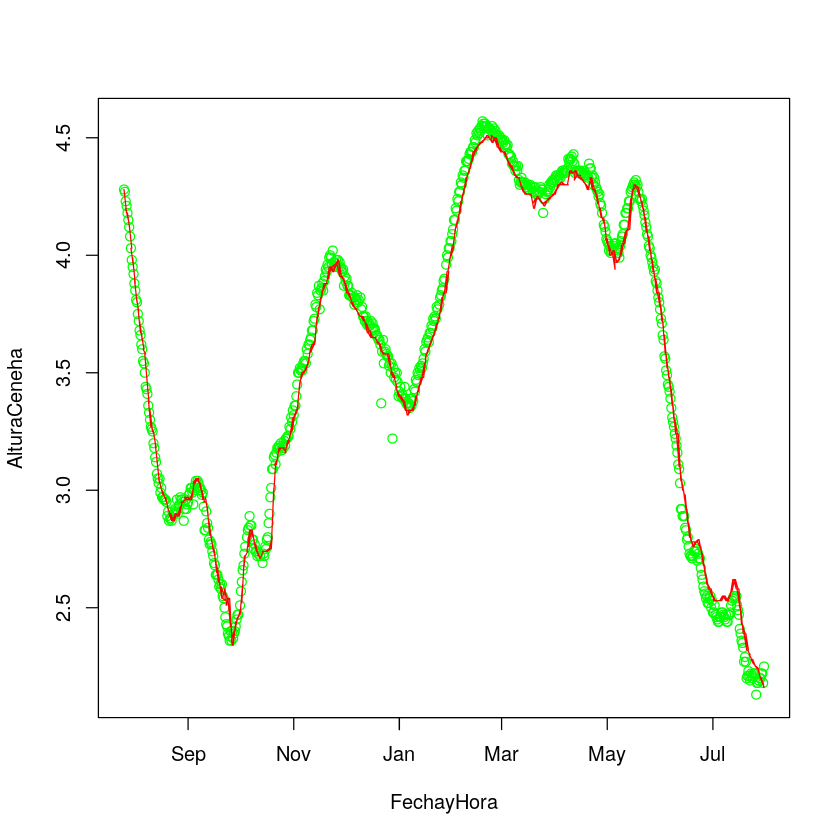

In [31]:
plot(FechayHora, AlturaCeneha, col="green")
lines(FechayHora, AlturaPrefectura,col="red")

In [34]:
modelo = lm(AlturaCeneha ~ AlturaPrefectura)
summary(modelo)


Call:
lm(formula = AlturaCeneha ~ AlturaPrefectura)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.288886 -0.029487  0.000385  0.029552  0.311091 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -0.140999   0.010180  -13.85   <2e-16 ***
AlturaPrefectura  1.042824   0.002833  368.05   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0506 on 727 degrees of freedom
Multiple R-squared:  0.9947,	Adjusted R-squared:  0.9947 
F-statistic: 1.355e+05 on 1 and 727 DF,  p-value: < 2.2e-16


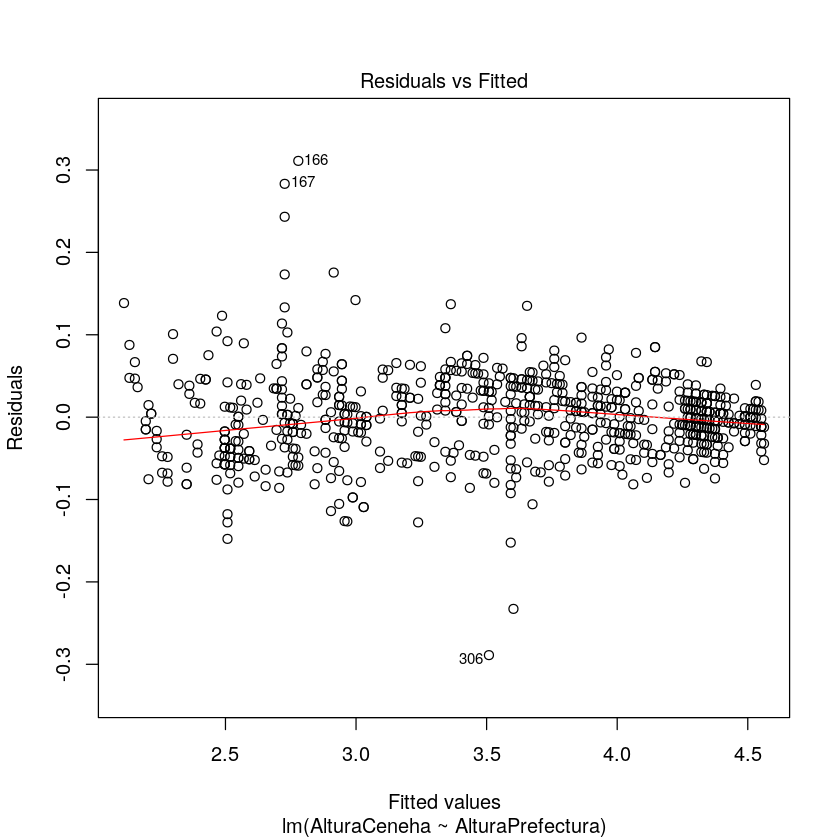

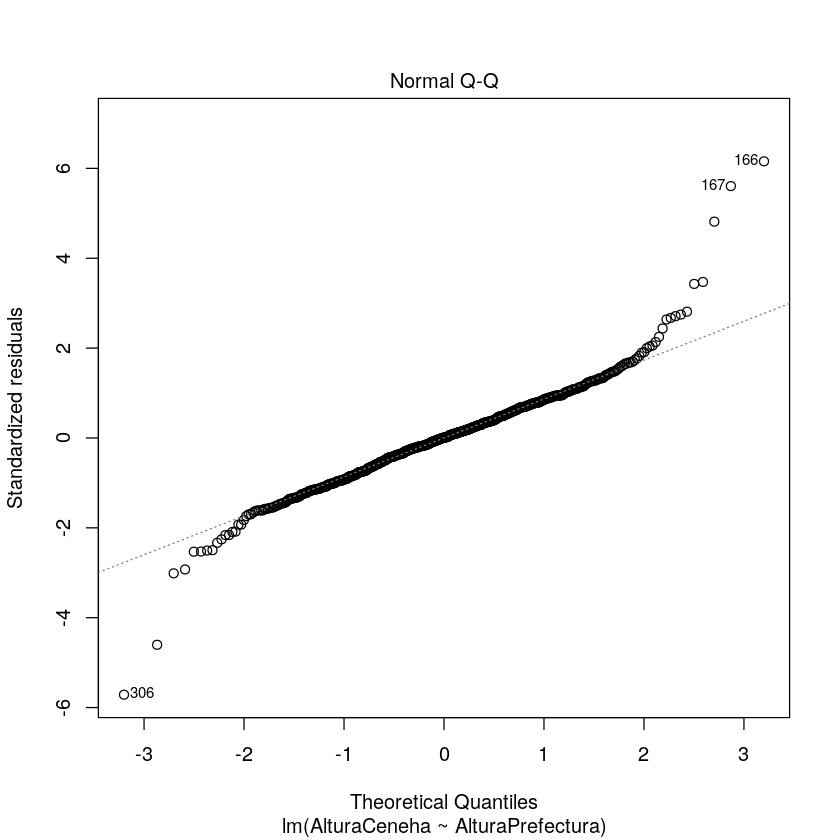

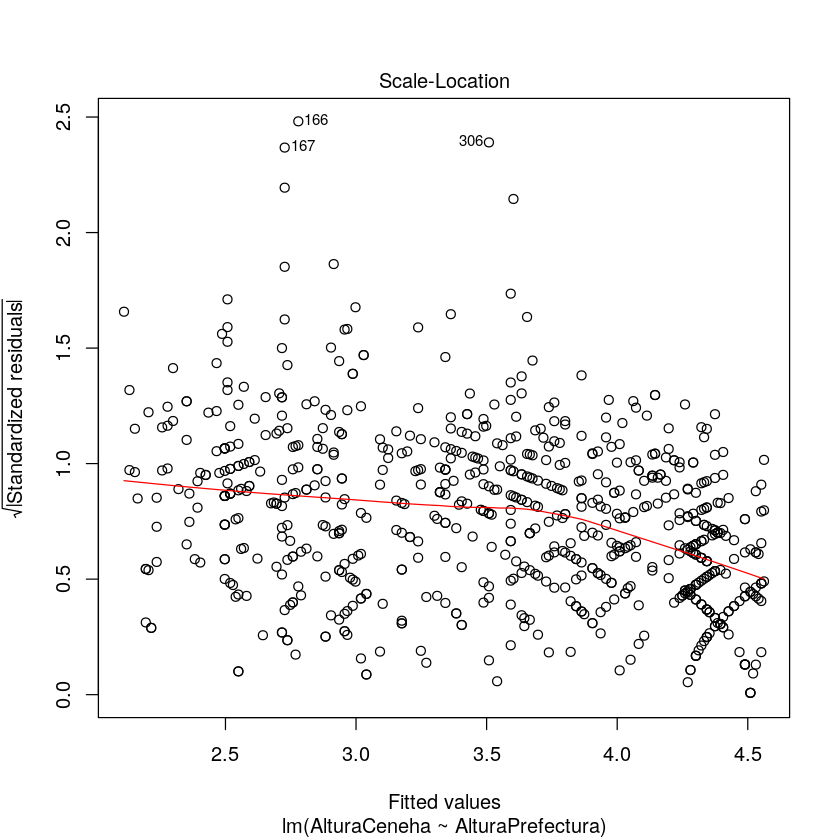

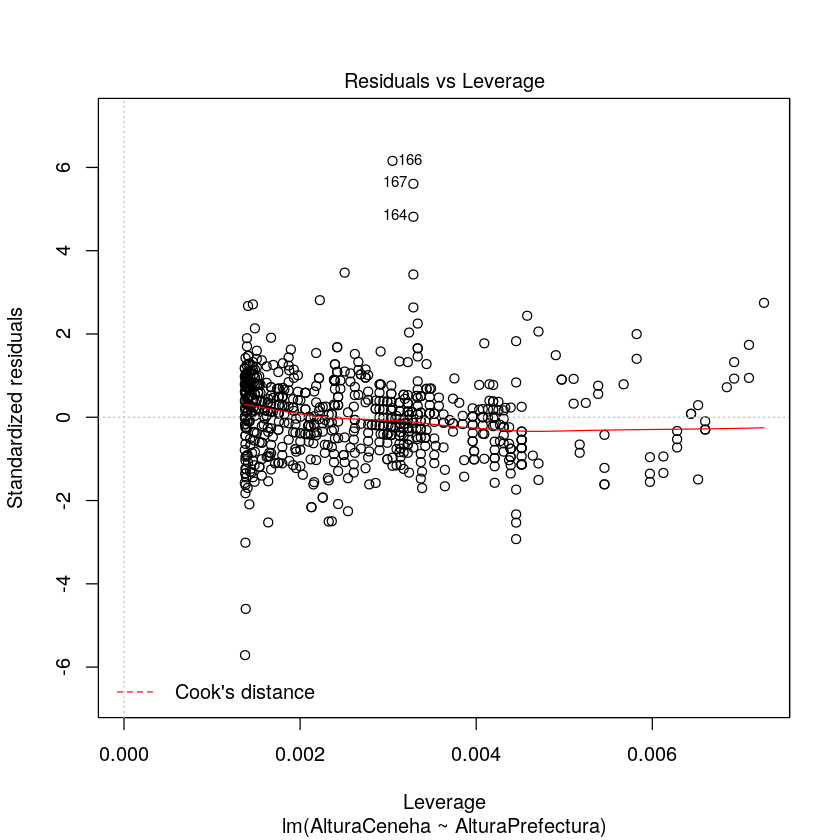

In [37]:
plot(modelo)


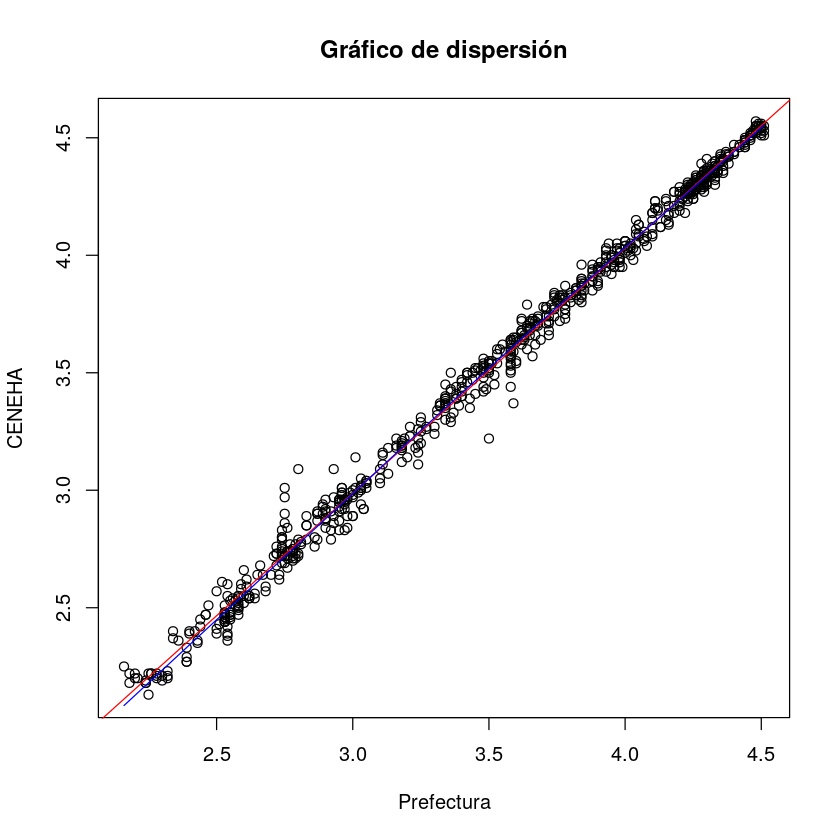

In [46]:
plot(AlturaCeneha~AlturaPrefectura, main="Gráfico de dispersión", xlab="Prefectura", ylab="CENEHA", data = datos)
abline(lm(AlturaCeneha~AlturaPrefectura, data = datos), col="red")
lines(lowess(AlturaPrefectura,AlturaCeneha), col="blue")

In [47]:
library(car)

Loading required package: carData


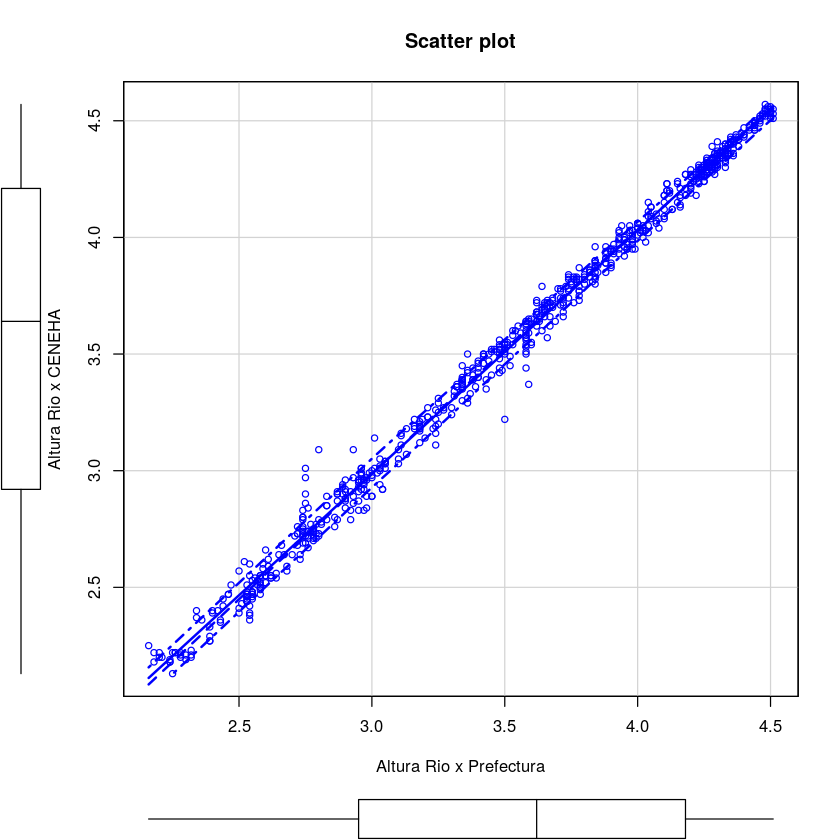

In [54]:
scatterplot(AlturaCeneha ~ AlturaPrefectura, data=datos, xlab="Altura Rio x Prefectura", ylab="Altura Rio x CENEHA", main="Scatter plot") 

## Gráfico de residuos adyacentes

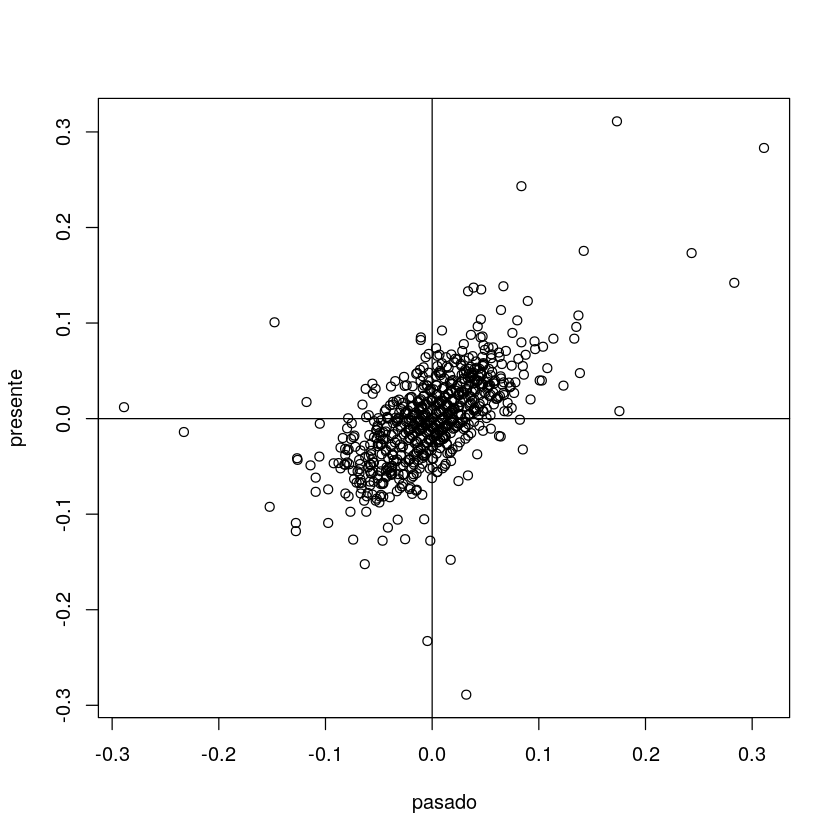

In [55]:
n = length(AlturaCeneha)
residuos = modelo$residuals
pasado = residuos[-n]
presente = residuos[-1]
plot(presente~pasado)
abline(h = 0, v = 0)

## Estimando $\alpha$

In [58]:
c1 = sum(presente*pasado)/(n-1)
c0 = sum(presente^2)/(n-1)
(r1 = c1/c0)

[1] 0.624843